## cctv와 인구분석 2
- 전처리 되어 저장된 데이터 불러오기
- cctv와 인구와의 관계를 scatter로 표현
- 관계데이터를 기반으로 한 대표직선(회귀직선)을 표현

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
# 데이터 가져오기
cctv_res = pd.read_csv('./data/data/data_result.csv')
cctv_res.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


In [4]:
cctv_res.set_index('구별', inplace=True)

In [5]:
cctv_res.head(2)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843


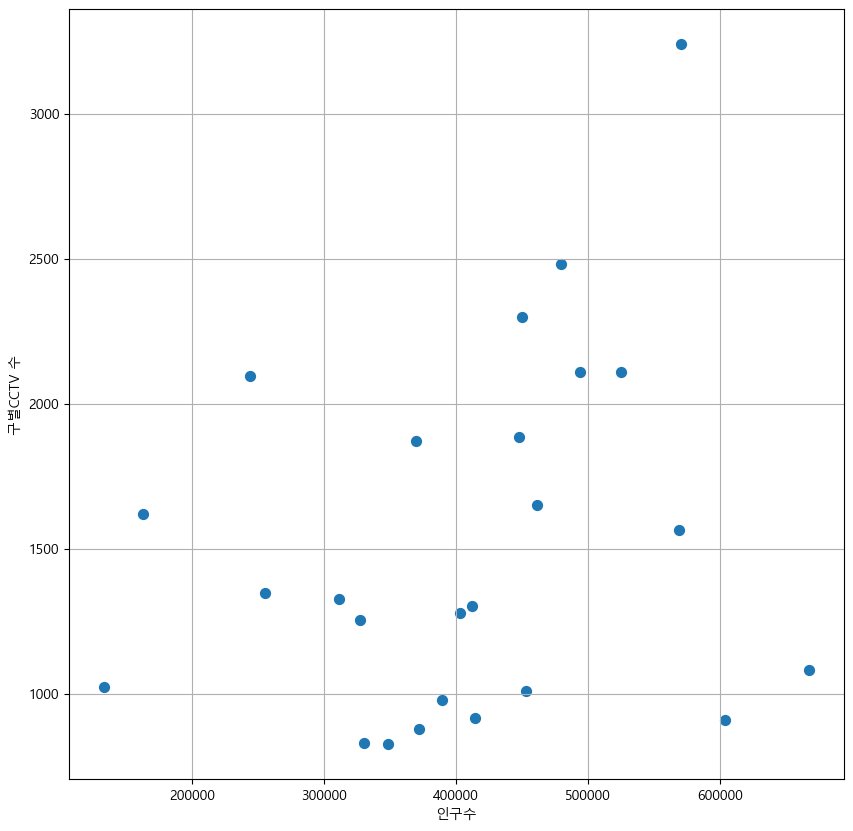

In [6]:
# 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'], cctv_res['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('구별CCTV 수')
plt.grid()
plt.show()

- y=b0+b1x (직선의 방정식)
    - 최소제곱법
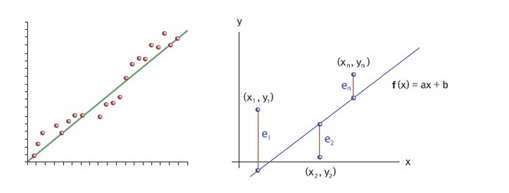
- 기울기
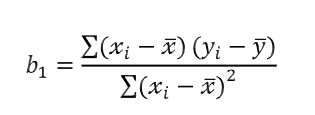
- 절편
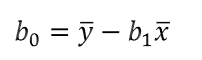

In [7]:
t1 = sum((cctv_res.인구수-cctv_res.인구수.mean())*(cctv_res.소계-cctv_res.소계.mean()))
t1

469022157.72

In [8]:
t2 = sum((cctv_res.인구수-cctv_res.인구수.mean())**2)
t2

407309531179.36

In [9]:
b1 = t1/t2
b1  # 기울기

0.0011515128466597672

In [10]:
b0 = cctv_res.소계.mean()-(b1*cctv_res.인구수.mean())
b0  # 절편

1045.6131195540388

In [11]:
fine_cctv = b0 + b1*400000  # 인구수 대비 적절한 cctc 개수
fine_cctv

1506.2182582179457

In [12]:
def temp_fun(b0, b1, x):
    return b0 + b1*x

In [13]:
temp_cctv = temp_fun(b0, b1, 400000)
temp_cctv

1506.2182582179457

#### cctv와 인구수의 관계 표현
- 소계, 인구수 산점도
- 소계, 인구수 대표하는 직선(회귀직선)

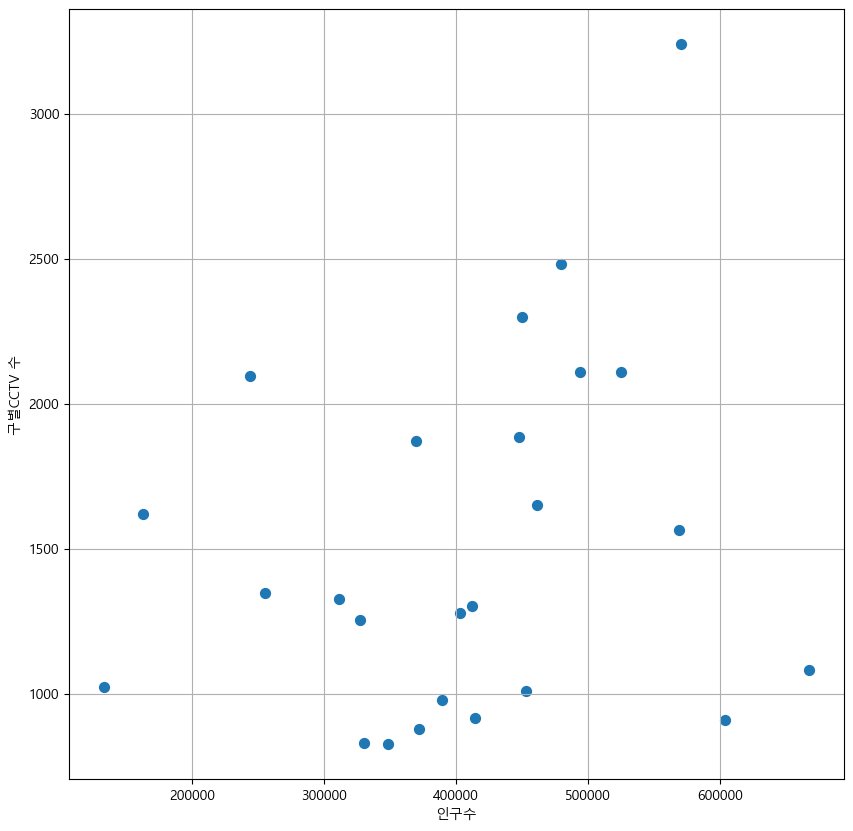

In [14]:
# 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'], cctv_res['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('구별CCTV 수')
plt.grid()
plt.show()

In [15]:
# 약한 양의 상관관계
np.corrcoef([cctv_res['인구수'], cctv_res['소계']])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

### 인구수와 cctv 대표하는 직선 그리기
- 회귀선
    - 회귀식

In [16]:
# 기울기와 절편 - np.polyfit(data1, data2, 차수) - 차수 생략 가능
poly_fit = np.polyfit(cctv_res.인구수, cctv_res.소계, 1)
poly_fit  # [기울기, 절편]

array([1.15151285e-03, 1.04561312e+03])

In [17]:
# 직선식을 생성 - np.poly1d(계수)
poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([1.15151285e-03, 1.04561312e+03])

In [18]:
poly_1d(400000)

1506.218258217946

In [19]:
# x좌표(인구수) 생성
# 임의의 인구수 (현재 수집된 데이터의 인구수 최대값, 최소값 범위 데이터)
xs = np.linspace(cctv_res.인구수.min(), cctv_res.인구수.max())
xs
len(xs)

50

In [20]:
# xs(임의의 인구수)에 대응하는 ys(cctv 대수) 계산
ys = poly_1d(xs)
ys

array([1199.04069124, 1211.59554181, 1224.15039238, 1236.70524294,
       1249.26009351, 1261.81494407, 1274.36979464, 1286.92464521,
       1299.47949577, 1312.03434634, 1324.5891969 , 1337.14404747,
       1349.69889804, 1362.2537486 , 1374.80859917, 1387.36344973,
       1399.9183003 , 1412.47315087, 1425.02800143, 1437.582852  ,
       1450.13770256, 1462.69255313, 1475.2474037 , 1487.80225426,
       1500.35710483, 1512.9119554 , 1525.46680596, 1538.02165653,
       1550.57650709, 1563.13135766, 1575.68620823, 1588.24105879,
       1600.79590936, 1613.35075992, 1625.90561049, 1638.46046106,
       1651.01531162, 1663.57016219, 1676.12501275, 1688.67986332,
       1701.23471389, 1713.78956445, 1726.34441502, 1738.89926558,
       1751.45411615, 1764.00896672, 1776.56381728, 1789.11866785,
       1801.67351841, 1814.22836898])

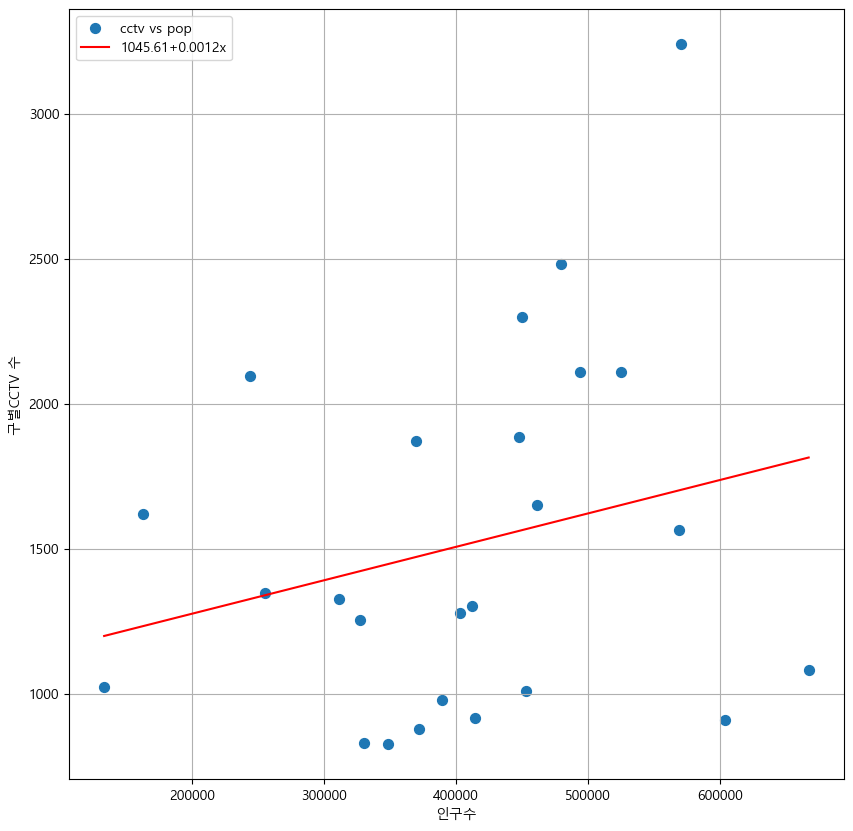

In [21]:
# 직선을 포함한 그래프 생성
# 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'], cctv_res['소계'], s=50, label = 'cctv vs pop')
plt.plot(xs, ys, color='red',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.4f}x')
plt.xlabel('인구수')
plt.ylabel('구별CCTV 수')
plt.legend(loc='upper left')
plt.grid()
plt.show()

- 인구수가 400000 적정 cctv 대수는 1500대라는것을 표현함
- 직선 위에 표현되는 data는 적정 cctv 대수 이상을 보유한 구
- 직선 아래에 표현되는 data는 적정 cctv 대수를 보유하지 못한 구

C:\Users\사용자\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


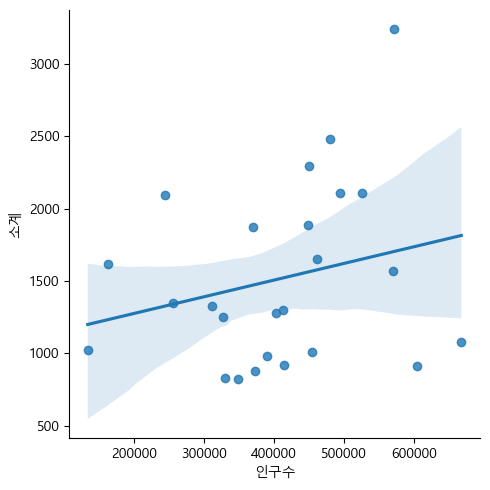

In [22]:
import seaborn as sns
sns.lmplot(x='인구수', y='소계', data=cctv_res)

In [23]:
# 자치구별 인구수 대비 적정 cctv 대수 계산
cctv_fine = poly_1d(cctv_res.인구수)
cctv_res['적정cctv수'] = cctv_fine

In [24]:
cctv_res.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,적정cctv수
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1702.551199
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,1567.516742
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,1425.833449
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,1740.864334
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,1650.750393


#### 실제 설치되어 있는 cctv 수와 예측된 수의 차이를 계산
- 차이가 큰 10개 자치구에 대해서는
    - 시각화(그래프) 객체 안에 자치구명을 표현

In [25]:
# 실제 cctv 수와 적정 cctv 수간의 차이 계산
temp = cctv_res.소계 - cctv_res.적정cctv수
temp

구별
강남구     1535.448801
강동구     -557.516742
강북구     -594.833449
강서구     -829.864334
관악구      458.249607
광진구     -596.164747
구로구      322.654216
금천구        8.656680
노원구     -135.266110
도봉구     -622.083467
동대문구     398.907490
동작구     -218.635199
마포구     -514.298949
서대문구    -168.345517
서초구      732.849130
성동구      -77.014584
성북구       74.240065
송파구     -733.228369
양천구      883.686047
영등포구    -232.655524
용산구      769.183989
은평구      493.092747
종로구      385.897559
중구      -176.040691
중랑구     -606.918649
dtype: float64

In [26]:
# 차이가 큰 10개의 자치구 선정
# 차이값이 +/- 로 나타남 : 절대값으로 순위를 구함
temp_10 = np.abs(temp).sort_values(ascending=False).head(10)

In [27]:
temp_10  # 더 많이 설치된 자치구, 더 적게 설치된 자치구 모두 포함

구별
강남구    1535.448801
양천구     883.686047
강서구     829.864334
용산구     769.183989
송파구     733.228369
서초구     732.849130
도봉구     622.083467
중랑구     606.918649
광진구     596.164747
강북구     594.833449
dtype: float64

In [28]:
# 그래프 위에 위 10개 자치구 명을 해당 scatter 위에 표시해야 함
# 10개 자치구의 소계(y)와 인구수(x)를 추출하고 이 값을 이용해 글자(자치구명) 출력
top_10 = cctv_res[['소계', '인구수']].loc[temp_10.index]

In [29]:
top_10  # 자치구명이 출력될 좌표

,소계,인구수
구별,,
강남구,3238,570500.0
양천구,2482,479978.0
강서구,911,603772.0
용산구,2096,244203.0
송파구,1081,667483.0
서초구,2297,450310.0
도봉구,825,348646.0
중랑구,916,414503.0
광진구,878,372164.0


- plt.text(x, y, 출력글자) : 한개의 글자가 출력

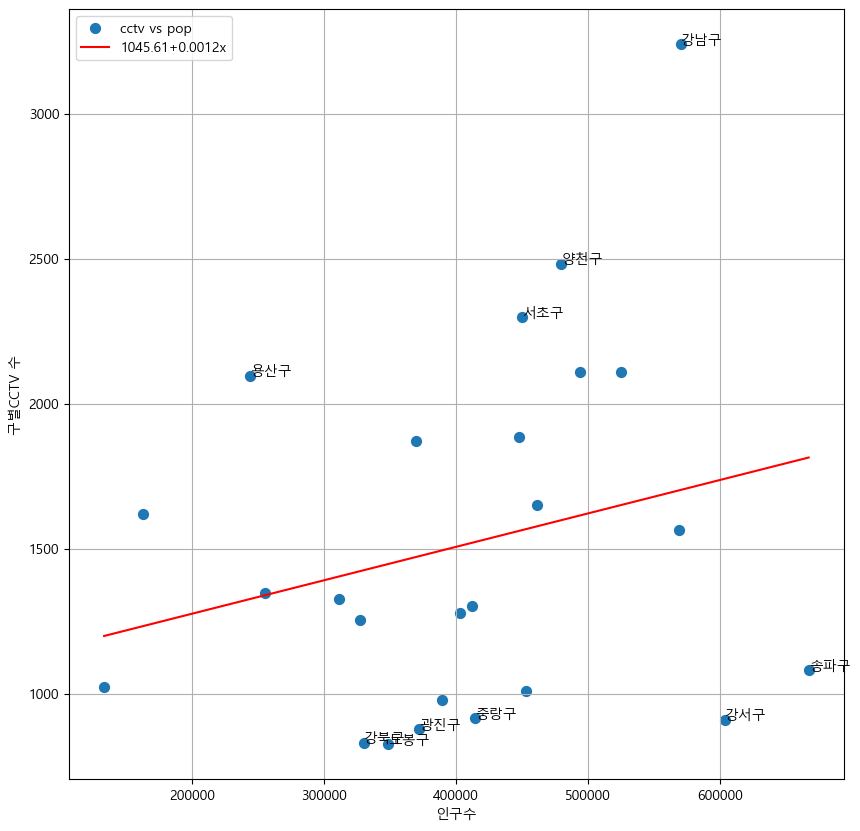

In [30]:
# 직선을 포함한 그래프 생성
# 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'], cctv_res['소계'], s=50, label = 'cctv vs pop')
plt.plot(xs, ys, color='red',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.4f}x')

for i in range(10):
    plt.text(top_10.인구수[i], top_10.소계[i], top_10.index[i])

plt.xlabel('인구수')
plt.ylabel('구별CCTV 수')
plt.legend(loc='upper left')
plt.grid()
plt.show()